<a href="https://colab.research.google.com/github/Boudia27/Projects/blob/main/project_1_facebook_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gensim import corpora
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import gensim
import matplotlib.pyplot as plt
import nltk
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Projects/project_1_Political_Advertisements_from_Facebook/fbpac-ads-en-US.csv')
data.head()

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977


In [ ]:
data.head()

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977


In [ ]:
print(data.columns)

Index(['id', 'html', 'political', 'not_political', 'title', 'message',
       'thumbnail', 'created_at', 'updated_at', 'lang', 'images',
       'impressions', 'political_probability', 'targeting', 'suppressed',
       'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings',
       'paid_for_by', 'targetedness', 'listbuilding_fundraising_proba'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162324 entries, 0 to 162323
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              162324 non-null  object 
 1   html                            162324 non-null  object 
 2   political                       162324 non-null  int64  
 3   not_political                   162324 non-null  int64  
 4   title                           162306 non-null  object 
 5   message                         162324 non-null  object 
 6   thumbnail                       162324 non-null  object 
 7   created_at                      162324 non-null  object 
 8   updated_at                      162324 non-null  object 
 9   lang                            162324 non-null  object 
 10  images                          162324 non-null  object 
 11  impressions                     162324 non-null  int64  
 12  political_probab

In [ ]:
data.isnull().sum()

id                                    0
html                                  0
political                             0
not_political                         0
title                                18
message                               0
thumbnail                             0
created_at                            0
updated_at                            0
lang                                  0
images                                0
impressions                           0
political_probability                 0
targeting                         46258
suppressed                            0
targets                            4207
advertiser                        37711
entities                           3666
page                               2560
lower_page                         2560
targetings                        48262
paid_for_by                       50279
targetedness                      49577
listbuilding_fundraising_proba     9930
dtype: int64

# Standardization, normalization, and encoding of categorical variables

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Standardization
standard_scaler = StandardScaler()
data['impressions_standardized'] = standard_scaler.fit_transform(data[['impressions']])

# Normalization
minmax_scaler = MinMaxScaler()
data['impressions_normalized'] = minmax_scaler.fit_transform(data[['impressions']])

# Encoding Categorical Variables
label_encoder = LabelEncoder()
data['political_encoded'] = label_encoder.fit_transform(data['political'])
data['not_political_encoded'] = label_encoder.fit_transform(data['not_political'])

# Print the transformed data
print(data[['impressions', 'impressions_standardized', 'impressions_normalized', 'political', 'political_encoded', 'not_political', 'not_political_encoded']])


        impressions  impressions_standardized  impressions_normalized  \
3                 1                 -0.244820                0.003145   
20                1                 -0.244820                0.003145   
23                5                  0.583919                0.015723   
32                3                  0.169550                0.009434   
38                2                 -0.037635                0.006289   
...             ...                       ...                     ...   
162317            1                 -0.244820                0.003145   
162319            1                 -0.244820                0.003145   
162320            1                 -0.244820                0.003145   
162321            1                 -0.244820                0.003145   
162323            3                  0.169550                0.009434   

        political  political_encoded  not_political  not_political_encoded  
3               0                  0          

# Clean data

In [ ]:
# Select only the columns of interest
columns_to_keep = ['id', 'political', 'not_political', 'title', 'message', 'created_at', 'updated_at', 'lang', 'impressions', 'political_probability', 'targeting', 'suppressed', 'advertiser', 'paid_for_by']
data = data[columns_to_keep]

# Drop any rows with missing values
data = data.dropna()

# Convert 'created_at' and 'updated_at' columns to datetime format
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# Remove any leading or trailing whitespace in string columns
string_columns = ['id', 'title', 'message', 'lang', 'targeting', 'advertiser', 'paid_for_by']
data[string_columns] = data[string_columns].apply(lambda x: x.str.strip())

# Print the cleaned DataFrame
print(data.head())


                   id  political  not_political  \
3   23843380741530360          0              0   
20  23843267430160083          0              0   
23  23843047113450081          0              0   
32  23842930886360741          4              1   
38      6097228149803          4              1   

                              title  \
3      Covenant House International   
20                         BOLD PAC   
23  Secure Financial Advisory Group   
32      Great Public Schools for US   
38               The Christian Left   

                                              message  \
3   <p>What more can you do in the final hours of ...   
20  <p>Donald Trump HATES anybody that tells the t...   
23  <div class="mbs _6m6 _2cnj _5s6c"><a href="htt...   
32  <div class="mbs _5pbx" id="js_26">We're fighti...   
38  <p>Human Rights Are Not Optional</p><p> Availa...   

                         created_at                       updated_at   lang  \
3  2018-12-30 20:59:13.879124+00:00 

# Text Analysis

In [ ]:
# Concatenate 'title' and 'message' columns into a single text column
data['text'] = data['title'].fillna('') + ' ' + data['message'].fillna('')

# Tokenize the words
data['tokens'] = data['text'].apply(word_tokenize)

# Flatten the tokenized words into a single list
all_words = [word for tokens in data['tokens'] for word in tokens]

# Calculate the word frequency distribution
freq_dist = FreqDist(all_words)

# Display the most common words
num_words = 10  # Number of most common words to display
print("Most common words:")
for word, frequency in freq_dist.most_common(num_words):
    print(word, ":", frequency)

Most common words:
< : 738421
> : 738421
'' : 549469
class= : 204150
to : 153629
the : 149607
. : 148478
, : 140091
p : 129314
/p : 129277


# Topic Modeling (using LDA)

In [ ]:
# Create a dictionary from the tokenized texts
dictionary = corpora.Dictionary()

# Add documents to the dictionary
for text in data['tokens']:
    dictionary.add_documents([text])

# Perform topic modeling using LDA
num_topics = 5  # Specify the number of topics
lda_model = models.LdaModel(id2word=dictionary, num_topics=num_topics, passes=10)

# Display the topics and their corresponding words
print("Topics:")
for idx, topic in lda_model.print_topics():
    print("Topic", idx + 1, ":", topic)


Topics:
Topic 1 : 0.000*"382" + 0.000*"formal" + 0.000*"grill" + 0.000*"u_fetchstream_5_1i" + 0.000*"Wurtzel" + 0.000*"//www.facebook.com/earthlawcenter/" + 0.000*"Ground" + 0.000*"Gustafson" + 0.000*"u_fetchstream_2_42" + 0.000*"BACKGROUND"
Topic 2 : 0.000*"//nyti.ms/2NDA4Yd" + 0.000*"tunnels." + 0.000*"destination" + 0.000*"outs" + 0.000*"//bit.ly/2q0wopL" + 0.000*"newest" + 0.000*"Topic" + 0.000*"VE" + 0.000*"Wysocki" + 0.000*"g_lvxjdwh6i"
Topic 3 : 0.000*"5K" + 0.000*"athlete" + 0.000*"TSRSpan_27" + 0.000*"js_53b" + 0.000*"Mackinac" + 0.000*"//www.facebook.com/OzForGovCT/" + 0.000*"Depression" + 0.000*"Attorney/Youth" + 0.000*"14253" + 0.000*"District4"
Topic 4 : 0.000*"u_fetchstream_1_1m" + 0.000*"Accomplished" + 0.000*"//pp-facebook-ads.s3.amazonaws.com/images/emoji.php/v9/f3a/1/16/1f645_1f3fd_200d_2640.png" + 0.000*"chairs" + 0.000*"eye-opening" + 0.000*"//www.gofundme.com/backtolifecampaign" + 0.000*"column" + 0.000*"//bit.ly/2OOGMjh" + 0.000*"EndWar" + 0.000*"Wisconsin-owned"


# Analyze the distribution of political and non-political ads and visualize

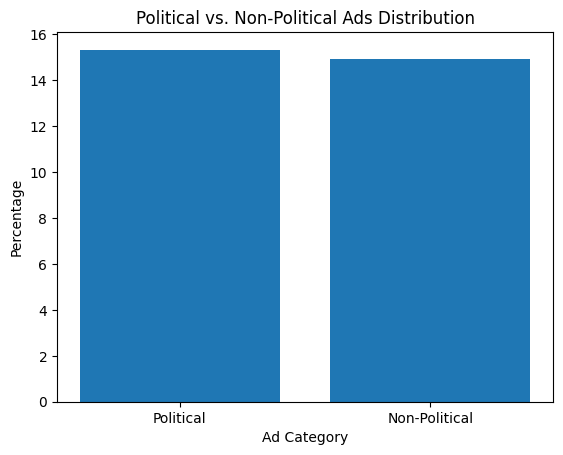

In [ ]:

# Analyze the distribution of political and non-political ads
political_ads = data[data['political'] == 1]
non_political_ads = data[data['not_political'] == 1]

total_ads = len(data)
num_political_ads = len(political_ads)
num_non_political_ads = len(non_political_ads)

percentage_political = (num_political_ads / total_ads) * 100
percentage_non_political = (num_non_political_ads / total_ads) * 100

# Visualize the results using a bar chart
categories = ['Political', 'Non-Political']
percentages = [percentage_political, percentage_non_political]

plt.bar(categories, percentages)
plt.xlabel('Ad Category')
plt.ylabel('Percentage')
plt.title('Political vs. Non-Political Ads Distribution')
plt.show()

# Time Analysis
## Analyze temporal patterns

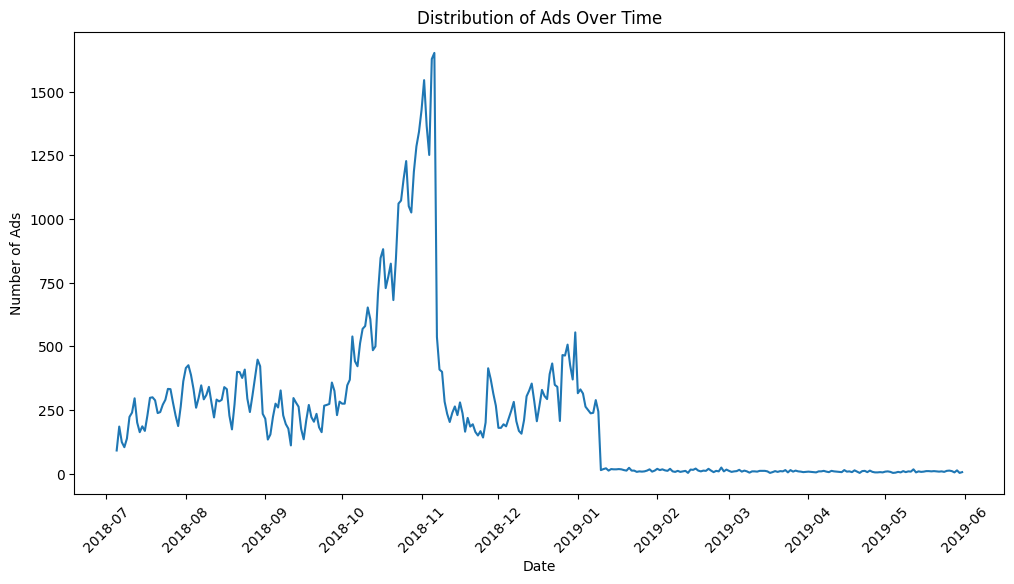

Most Active Date: 2018-11-06
Least Active Date: 2019-02-13


In [ ]:
# Convert 'created_at' and 'updated_at' columns to datetime
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# Extract date and time components
data['created_date'] = data['created_at'].dt.date
data['created_time'] = data['created_at'].dt.time
data['updated_date'] = data['updated_at'].dt.date
data['updated_time'] = data['updated_at'].dt.time

# Analyze distribution of ads over time
ads_per_date = data['created_date'].value_counts().sort_index()

# Plot the distribution of ads over time
plt.figure(figsize=(12, 6))
plt.plot(ads_per_date.index, ads_per_date.values)
plt.xlabel('Date')
plt.ylabel('Number of Ads')
plt.title('Distribution of Ads Over Time')
plt.xticks(rotation=45)
plt.show()

# Identify periods of high or low ad activity
most_active_date = ads_per_date.idxmax()
least_active_date = ads_per_date.idxmin()

print("Most Active Date:", most_active_date)
print("Least Active Date:", least_active_date)


## Advertiser Analysis

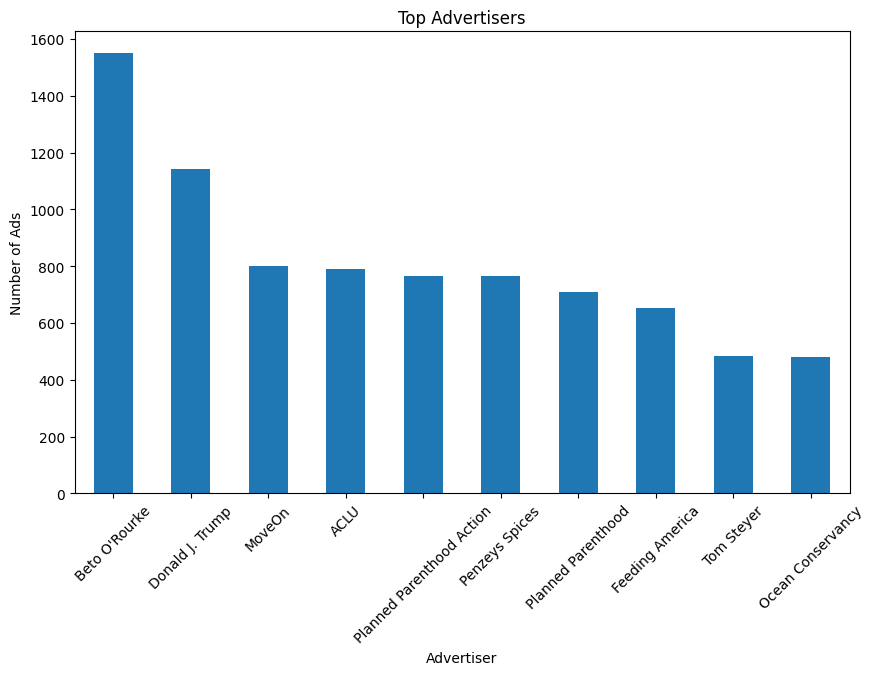

Political and Non-Political Ad Ratios for Top Advertisers:
Beto O'Rourke
Political Ratio: 0.02114698459664085
Non-Political Ratio: 0.011625827222321588

Donald J. Trump
Political Ratio: 0.014620137498912193
Non-Political Ratio: 0.013861563226614202

MoveOn
Political Ratio: 0.01140022626403272
Non-Political Ratio: 0.010999821141119656

ACLU
Political Ratio: 0.010442955356365852
Non-Political Ratio: 0.017081023072795565

Planned Parenthood Action
Political Ratio: 0.01140022626403272
Non-Political Ratio: 0.015471293149704883

Penzeys Spices
Political Ratio: 0.012705595683578453
Non-Political Ratio: 0.012609551064210339

Planned Parenthood
Political Ratio: 0.009311635192759552
Non-Political Ratio: 0.011715256662493293

Feeding America
Political Ratio: 0.010878078496214428
Non-Political Ratio: 0.006617778572706135

Tom Steyer
Political Ratio: 0.006526847097728657
Non-Political Ratio: 0.006349490252191022

Ocean Conservancy
Political Ratio: 0.0075711426333652425
Non-Political Ratio: 0.008495

In [ ]:
# Analyze the distribution of advertisers
advertiser_counts = data['advertiser'].value_counts()

# Identify the top advertisers
num_top_advertisers = 10  # Number of top advertisers to display
top_advertisers = advertiser_counts.head(num_top_advertisers)

# Plot the distribution of top advertisers
plt.figure(figsize=(10, 6))
top_advertisers.plot(kind='bar')
plt.xlabel('Advertiser')
plt.ylabel('Number of Ads')
plt.title('Top Advertisers')
plt.xticks(rotation=45)
plt.show()

# Analyze political and non-political ad ratios
political_ads = data[data['political'] == 1]
non_political_ads = data[data['not_political'] == 1]
total_political_ads = political_ads.shape[0]
total_non_political_ads = non_political_ads.shape[0]

# Calculate political and non-political ad ratios for top advertisers
advertiser_ratios = {}
for advertiser in top_advertisers.index:
    advertiser_political_ads = political_ads[political_ads['advertiser'] == advertiser].shape[0]
    advertiser_non_political_ads = non_political_ads[non_political_ads['advertiser'] == advertiser].shape[0]
    advertiser_ratios[advertiser] = {
        'political_ratio': advertiser_political_ads / total_political_ads,
        'non_political_ratio': advertiser_non_political_ads / total_non_political_ads
    }

# Display the political and non-political ad ratios for top advertisers
print("Political and Non-Political Ad Ratios for Top Advertisers:")
for advertiser, ratios in advertiser_ratios.items():
    print(advertiser)
    print("Political Ratio:", ratios['political_ratio'])
    print("Non-Political Ratio:", ratios['non_political_ratio'])
    print()


## Political and non-political ad ratios

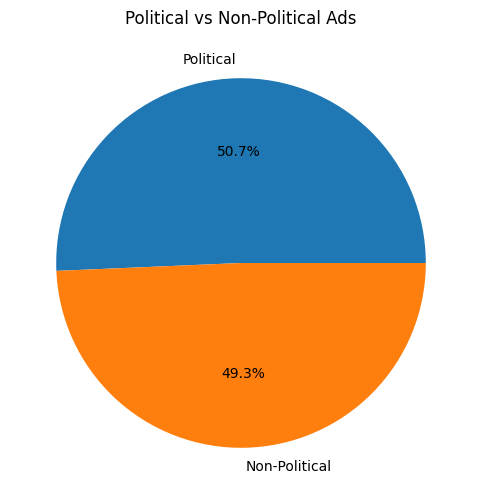

In [ ]:
# Create a pie chart of political and non-political ad ratios
political_ads = data[data['political'] == 1].shape[0]
non_political_ads = data[data['not_political'] == 1].shape[0]
ad_labels = ['Political', 'Non-Political']
ad_counts = [political_ads, non_political_ads]

plt.figure(figsize=(6, 6))
plt.pie(ad_counts, labels=ad_labels, autopct='%1.1f%%')
plt.title('Political vs Non-Political Ads')
plt.show()



# Mean Median Std

In [ ]:
# Extract the 'political' and 'not_political' columns
political_ads = data['political']
non_political_ads = data['not_political']

# Calculate the mean, median, and standard deviation for 'political' column
political_mean = political_ads.mean()
political_median = political_ads.median()
political_std = political_ads.std()

# Calculate the mean, median, and standard deviation for 'not_political' column
non_political_mean = non_political_ads.mean()
non_political_median = non_political_ads.median()
non_political_std = non_political_ads.std()

# Print the results
print("Statistics for 'political' column:")
print(f"Mean: {political_mean}")
print(f"Median: {political_median}")
print(f"Standard Deviation: {political_std}\n")

print("Statistics for 'not_political' column:")
print(f"Mean: {non_political_mean}")
print(f"Median: {non_political_median}")
print(f"Standard Deviation: {non_political_std}")

Statistics for 'political' column:
Mean: 6.637007495931923
Median: 2.0
Standard Deviation: 13.484827945900046

Statistics for 'not_political' column:
Mean: 1.075826286445968
Median: 0.0
Standard Deviation: 3.3534809081211625


In [ ]:
# Specify the ANOVA model formula
formula = 'impressions ~ political * not_political'

# Create a model for two-way ANOVA
model = ols(formula, data=data).fit()

# Perform two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA results
print(anova_table)


                               sum_sq       df            F         PR(>F)
political                3.304761e+02      1.0    14.669508   1.282062e-04
not_political            4.457620e+04      1.0  1978.693503   0.000000e+00
political:not_political  1.189321e+04      1.0   527.927699  2.018646e-116
Residual                 1.688932e+06  74970.0          NaN            NaN


# T-statistic, F-value, and p-value for a two-way ANOVA

In [ ]:
# Create a model for two-way ANOVA
model = ols(formula, data=data).fit()

# Perform two-way ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Extract T-statistic, F-value, and p-value
t_statistic = model.tvalues
f_value = anova_results['F']
p_value = anova_results['PR(>F)']

# Print the results
print("T-statistic:")
print(t_statistic)
print("\nF-value:")
print(f_value)
print("\nP-value:")
print(p_value)


T-statistic:
Intercept                  89.197622
political                   4.693510
not_political              49.984692
political:not_political   -22.976677
dtype: float64

F-value:
political                    14.669508
not_political              1978.693503
political:not_political     527.927699
Residual                           NaN
Name: F, dtype: float64

P-value:
political                   1.282062e-04
not_political               0.000000e+00
political:not_political    2.018646e-116
Residual                             NaN
Name: PR(>F), dtype: float64
